<a href="https://colab.research.google.com/github/kh-pi/ClassificationKMeansR/blob/main/CompetitionDataafrique_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des Données

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=4f0f3ed165a1bd8df7d44253c8cc1b28b7d25616e083fa888b7109a1ddd795de
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [4]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.0 MB/s eta 0:00:00


In [5]:
import wget
url = 'https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/train.csv'
train_data = wget.download(url)
train = pd.read_csv(train_data)
train.sample(10)

,country,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,demande_energetique_projectee,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,...,taux_adoption_energies_renouvelables,stabilite_politique,taux_acces_energie,niveau_urbanisation,potentiel_investissement,types_sols,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques
95290,Morocco,31.7917,-7.0926,36910560,4.350100,1581.450291,2742.910321,579.726027,3512.918254,1455.476120,...,17.838314,6.058411,34.869847,28.633648,4,rocheux,5678.192844,0.413027,traditionnel,5
92763,Egypt,26.8206,30.8024,102334404,6.006806,1118.003255,1799.921330,1102.971915,2394.369340,1096.217206,...,43.516339,3.404269,54.378786,58.763295,4,sablonneux,1468.802233,0.624412,traditionnel,6
36996,Tunisia,33.8869,9.5375,11818618,5.996381,2768.071622,3364.736518,1396.523251,3387.152819,1098.495292,...,41.428818,4.301536,26.148872,20.048489,4,sablonneux,7817.698864,0.737873,traditionnel,7
23142,Togo,8.6195,0.8248,8278724,4.870215,1361.740884,1505.261631,1870.675929,3029.816507,878.887017,...,49.201402,6.172026,22.289941,22.935861,2,argileux,7430.823150,0.513269,moderne,5
54256,Nigeria,9.0820,8.6750,206139589,4.181546,4254.965180,5200.334749,493.311875,2904.080076,1213.609631,...,6.862227,8.242001,53.968672,27.580183,1,rocheux,3646.392967,0.542739,moderne,5
51859,Mauritania,21.0079,-10.9408,4649658,5.258733,2433.273576,3171.524663,1136.368730,3181.322289,1355.230139,...,1.906914,9.537318,52.861874,40.016202,5,rocheux,3660.732771,0.604525,moderne,3
15523,Egypt,26.8206,30.8024,102334404,5.070465,3085.378970,3551.619349,1542.925886,2328.548586,808.086472,...,45.365337,4.312720,39.248510,22.783376,4,rocheux,7624.895302,0.458156,moderne,8
32904,Djibouti,11.8251,42.5903,988000,4.204755,3529.098606,5566.482970,1174.032701,2073.995987,1053.902559,...,10.570281,6.327434,61.065764,41.051830,3,sablonneux,86.010265,0.777396,moderne,2
94800,Mauritania,21.0079,-10.9408,4649658,6.198077,4706.497145,7578.427974,240.312221,2576.086453,1165.772125,...,49.426220,5.870946,24.371454,62.991489,2,rocheux,4781.508293,0.565357,moderne,5
109605,Cameroon,3.8480,11.5021,26545863,5.976337,851.574950,1055.422341,1442.610470,2279.750640,1167.259687,...,6.676734,6.035957,56.454689,41.342270,4,sablonneux,2118.798044,0.585070,moderne,9


In [6]:
url = 'https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/test.csv'
data_test = wget.download(url)
test = pd.read_csv(data_test)
test.sample(10)

,country,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,demande_energetique_projectee,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,...,taux_adoption_energies_renouvelables,stabilite_politique,taux_acces_energie,niveau_urbanisation,potentiel_investissement,types_sols,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques
11131,Eswatini (Swaziland),-26.5225,31.4659,1160164,4.838406,3720.288430,7244.040147,687.683757,3068.371164,1180.883146,...,13.994647,2.199967,22.171733,41.556395,5,argileux,4181.865910,0.371993,traditionnel,6
53521,Liberia,6.4281,-9.4295,5057681,4.487363,3395.722241,6408.892804,1930.397598,2962.148130,978.088503,...,22.544413,9.528300,75.297627,23.449666,1,sablonneux,2689.715308,0.380881,moderne,6
51295,Chad,15.4542,18.7322,16425864,4.212087,2419.971022,3313.821722,796.813886,2896.837853,1373.345385,...,49.630702,3.802163,57.375507,62.051468,3,sablonneux,8477.876678,0.792826,moderne,1
46510,Lesotho,-29.6099,28.2336,2142249,4.648583,4632.435281,6151.513562,629.608297,2983.078053,815.800924,...,34.021960,5.527821,86.499730,31.740247,5,sablonneux,7471.117740,0.401568,traditionnel,0
4905,Nigeria,9.0820,8.6750,206139589,5.277341,3365.566647,5296.374887,1860.909620,3636.887395,1316.409854,...,45.664335,4.766596,46.316867,62.763388,1,rocheux,5553.235190,0.762738,traditionnel,2
59767,Morocco,31.7917,-7.0926,36910560,5.142978,418.800361,821.771024,1158.957174,3210.348568,1452.951348,...,14.813261,3.033315,69.432378,64.740588,2,rocheux,7858.685114,0.531369,moderne,4
16376,Egypt,26.8206,30.8024,102334404,6.530745,429.100911,451.791505,1385.344176,3763.752248,1060.844695,...,6.642072,5.636500,19.271006,46.389255,4,sablonneux,8178.584037,0.653802,moderne,8
57310,Gambia,13.4432,-15.3101,2416668,4.300820,3188.030022,4605.171841,730.017742,3799.331159,1035.149259,...,NaN,8.743175,28.010159,45.800589,4,rocheux,2250.586190,0.383143,moderne,4
53945,Guinea,9.9456,-9.6966,13132795,4.136699,4081.327970,6294.235082,610.812456,2714.476592,816.247390,...,29.286547,9.529823,67.974035,27.832638,3,rocheux,1987.894460,0.487923,traditionnel,8
20734,Sierra Leone,8.4606,-11.7799,7976983,6.112175,2720.115827,4893.761219,94.839951,3327.356036,1333.796943,...,21.235561,6.061647,59.117293,58.141264,4,argileux,231.177472,0.590014,traditionnel,9


In [7]:
url = 'https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/submission.csv'
data_sub = wget.download(url)
sub = pd.read_csv(data_sub)
sub.sample(10)

,country,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,proximite_infrastructures_energetiques,taux_adoption_energies_renouvelables,stabilite_politique,taux_acces_energie,niveau_urbanisation,potentiel_investissement,types_sols,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques
15646,Mauritania,21.0079,-10.9408,4649658,5.195837,2437.831352,883.678750,3147.562467,1371.950602,76.012844,38.940605,7.966716,41.909037,23.185357,1,rocheux,7879.601229,0.415849,traditionnel,1
5567,Namibia,-22.9576,18.4904,2540905,4.002479,592.904020,1192.714553,2022.305105,1192.957588,45.922401,29.682844,8.856526,57.096717,35.889313,5,argileux,3414.083561,0.749241,moderne,3
9470,Côte d'Ivoire,7.5399,-5.5471,26378274,5.090495,993.689356,1925.683572,3046.336242,1459.713820,14.148436,29.858691,2.141847,71.714694,48.689836,4,sablonneux,3081.302960,0.380853,traditionnel,7
3141,Djibouti,11.8251,42.5903,988000,4.428054,1920.649916,797.316328,3831.261707,1325.245327,66.964058,3.407523,2.152855,68.923993,57.872481,2,rocheux,907.691964,0.775527,moderne,5
8817,Congo (Brazzaville),-0.2280,15.8277,5518092,6.251516,1848.479256,582.827793,3056.158726,1325.430575,40.405532,43.758004,8.043509,83.484531,46.798928,2,rocheux,6791.570366,0.572296,traditionnel,0
23869,Equatorial Guinea,1.6508,10.2679,1402985,5.870184,1663.272876,1881.182934,2715.044736,1151.087801,62.231641,26.270205,4.373683,87.569137,37.329811,2,sablonneux,5595.924381,0.613809,traditionnel,3
24649,Libya,26.3351,17.2283,6871292,4.365039,1909.227624,1944.760525,2457.713661,891.571866,10.159202,32.627336,4.215745,68.687163,35.508106,2,argileux,6774.310175,0.784533,traditionnel,0
23112,Namibia,-22.9576,18.4904,2540905,6.996167,4228.455544,825.527822,3466.302979,1159.294038,45.356993,48.933071,6.423589,36.767987,53.383611,3,argileux,5081.087840,0.326327,traditionnel,1
5064,Congo (Brazzaville),-0.2280,15.8277,5518092,6.034009,2404.050054,273.557718,2057.833543,984.690910,52.824091,48.696826,9.744459,79.430938,20.926357,3,sablonneux,7862.507288,0.706245,traditionnel,8
11935,Guinea,9.9456,-9.6966,13132795,4.450978,2875.056006,649.696157,2814.606063,1053.834718,60.129302,2.744524,5.668819,87.201785,37.772050,1,rocheux,851.877231,0.321987,moderne,6


# Analyses Descriptives

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   country                                 150000 non-null  object 
 1   lat                                     150000 non-null  float64
 2   lon                                     150000 non-null  float64
 3   population                              150000 non-null  int64  
 4   taux_ensoleillement                     150000 non-null  float64
 5   demande_energetique_actuelle            150000 non-null  float64
 6   demande_energetique_projectee           150000 non-null  float64
 7   capacite_installee_actuelle             150000 non-null  float64
 8   duree_ensoleillement_annuel             150000 non-null  float64
 9   cout_installation_solaire               150000 non-null  float64
 10  proximite_infrastructures_energetiques  1500

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62500 entries, 0 to 62499
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 62500 non-null  object 
 1   lat                                     62500 non-null  float64
 2   lon                                     62500 non-null  float64
 3   population                              62500 non-null  int64  
 4   taux_ensoleillement                     62500 non-null  float64
 5   demande_energetique_actuelle            62500 non-null  float64
 6   demande_energetique_projectee           62500 non-null  float64
 7   capacite_installee_actuelle             62500 non-null  float64
 8   duree_ensoleillement_annuel             62500 non-null  float64
 9   cout_installation_solaire               62500 non-null  float64
 10  proximite_infrastructures_energetiques  62500 non-null  fl

In [10]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 25000 non-null  object 
 1   lat                                     25000 non-null  float64
 2   lon                                     25000 non-null  float64
 3   population                              25000 non-null  int64  
 4   taux_ensoleillement                     25000 non-null  float64
 5   demande_energetique_actuelle            25000 non-null  float64
 6   capacite_installee_actuelle             25000 non-null  float64
 7   duree_ensoleillement_annuel             25000 non-null  float64
 8   cout_installation_solaire               25000 non-null  float64
 9   proximite_infrastructures_energetiques  25000 non-null  float64
 10  taux_adoption_energies_renouvelables    22507 non-null  fl

In [11]:
train.describe()

,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,demande_energetique_projectee,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,proximite_infrastructures_energetiques,taux_adoption_energies_renouvelables,stabilite_politique,taux_acces_energie,niveau_urbanisation,potentiel_investissement,emissions_co2_evitees,idh,nombre_animaux_domestiques
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,134864.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.204157,16.493778,2.522295e+07,5.498319,2554.848606,3896.053758,1024.344390,3001.292562,1149.543446,49.917513,25.005484,5.504654,50.002024,45.032828,3.002847,4984.413869,0.550090,4.501973
std,15.495124,19.346708,3.574158e+07,0.865709,1416.170655,2304.560838,562.096087,578.095387,202.030306,28.857227,14.423153,2.595186,23.102159,14.421728,1.413756,2888.842931,0.144583,2.869750
min,-30.559500,-23.041800,9.834700e+04,4.000055,100.033990,107.515374,50.004456,2000.007113,800.001077,0.001092,0.000256,1.000025,10.000116,20.000187,1.000000,0.147350,0.300005,0.000000
25%,-4.679600,0.824800,3.546437e+06,4.747006,1325.380969,1949.653254,537.791761,2498.979245,974.693496,24.876825,12.556725,3.260647,30.032366,32.533373,2.000000,2494.341623,0.424935,2.000000
50%,6.611100,18.490400,1.313280e+07,5.499631,2557.407637,3767.976294,1024.182723,3002.988483,1149.391548,49.985940,24.968379,5.502115,49.988858,45.075952,3.000000,4968.117967,0.549723,4.000000
75%,12.862800,31.306900,3.107294e+07,6.248083,3780.522576,5594.079254,1511.082533,3501.538422,1324.360898,74.786877,37.480588,7.752408,69.979721,57.507313,4.000000,7472.625920,0.675476,7.000000
max,33.886900,55.492000,2.061396e+08,6.999989,4999.969328,9981.053695,1999.965613,3999.982102,1499.997354,99.998845,49.999820,9.999986,89.999885,69.999992,5.000000,9999.923721,0.800000,9.000000


In [12]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,62500.0,3.214848e+00,1.548871e+01,-30.559500,-4.679600e+00,6.611100e+00,1.286280e+01,3.388690e+01
lon,62500.0,1.652454e+01,1.934075e+01,-23.041800,8.248000e-01,1.849040e+01,3.130690e+01,5.549200e+01
population,62500.0,2.526593e+07,3.566197e+07,98347.000000,3.546437e+06,1.313280e+07,3.107294e+07,2.061396e+08
taux_ensoleillement,62500.0,5.500226e+00,8.682266e-01,4.000027,4.745481e+00,5.499943e+00,6.249958e+00,6.999926e+00
demande_energetique_actuelle,62500.0,2.547066e+03,1.411955e+03,100.016363,1.324499e+03,2.552215e+03,3.762815e+03,4.999985e+03
demande_energetique_projectee,62500.0,3.886837e+03,2.296250e+03,109.830365,1.950514e+03,3.767555e+03,5.579481e+03,9.991252e+03
capacite_installee_actuelle,62500.0,1.025686e+03,5.623038e+02,50.014521,5.380471e+02,1.025450e+03,1.511868e+03,1.999989e+03
duree_ensoleillement_annuel,62500.0,3.000143e+03,5.782900e+02,2000.052083,2.498496e+03,3.000171e+03,3.503112e+03,3.999990e+03
cout_installation_solaire,62500.0,1.150140e+03,2.023328e+02,800.011482,9.748975e+02,1.150686e+03,1.325420e+03,1.499975e+03
proximite_infrastructures_energetiques,62500.0,4.985358e+01,2.880898e+01,0.001068,2.478990e+01,4.987143e+01,7.476793e+01,9.999992e+01


In [13]:
sub.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,25000.0,3.178562e+00,1.552913e+01,-30.559500,-4.679600e+00,6.611100e+00,1.286280e+01,3.388690e+01
lon,25000.0,1.636286e+01,1.939188e+01,-23.041800,8.248000e-01,1.849040e+01,3.130690e+01,5.549200e+01
population,25000.0,2.476466e+07,3.497018e+07,98347.000000,3.546437e+06,1.313280e+07,3.107294e+07,2.061396e+08
taux_ensoleillement,25000.0,5.495622e+00,8.677892e-01,4.000094,4.742757e+00,5.499037e+00,6.242117e+00,6.999953e+00
demande_energetique_actuelle,25000.0,2.556349e+03,1.410546e+03,100.029662,1.347465e+03,2.550958e+03,3.774803e+03,4.999714e+03
capacite_installee_actuelle,25000.0,1.025066e+03,5.651481e+02,50.348063,5.349434e+02,1.025925e+03,1.515439e+03,1.999972e+03
duree_ensoleillement_annuel,25000.0,3.004251e+03,5.780608e+02,2000.018840,2.504576e+03,3.010046e+03,3.507214e+03,3.999913e+03
cout_installation_solaire,25000.0,1.148701e+03,2.030169e+02,800.000104,9.719061e+02,1.147215e+03,1.324846e+03,1.499926e+03
proximite_infrastructures_energetiques,25000.0,5.006360e+01,2.891181e+01,0.007022,2.512697e+01,5.013236e+01,7.494635e+01,9.999579e+01
taux_adoption_energies_renouvelables,22507.0,2.504035e+01,1.450218e+01,0.004767,1.249104e+01,2.501317e+01,3.768885e+01,4.999890e+01


*On constact que la variable taux_adoption_energies_renouvelables comporte des données manquantes que nous serions obligés de remplir par la moyenne ou la mediane. Mais d'abord avant toute chose nous allons verifer que la variable en question n'a pas de valeurs aberrantes auquel cas nous allons utiliser la mediane sinon on va utiliser la moyenne
egalement On remarque que la pour toutes les variables numeriques la moyenne et la mediane sont pratiquement egale cela confirme une distribution symetrique des variables on peut donc dire qu'il n'y a pas d'echantillons qui s'ecartent trop de la moyenne et donc pas de données aberrantes*

# Analyse Exploratoire des Données

In [14]:
# On peut generer la moyenne de certaines variables en fonction de chaque pays
train.groupby('country').agg({'demande_energetique_actuelle':'sum',
                             'capacite_installee_actuelle':'sum',
                             'cout_installation_solaire':'sum'})

,demande_energetique_actuelle,capacite_installee_actuelle,cout_installation_solaire
country,,,
Algeria,7.064110e+06,2.782670e+06,3.182899e+06
Angola,7.256775e+06,2.938823e+06,3.298850e+06
Benin,7.310675e+06,2.938075e+06,3.280305e+06
Botswana,7.037940e+06,2.886728e+06,3.199409e+06
Burkina Faso,7.315768e+06,2.964952e+06,3.309455e+06
Burundi,7.344829e+06,2.948996e+06,3.267593e+06
Cameroon,7.279689e+06,2.921431e+06,3.318619e+06
Cape Verde,7.303057e+06,2.930091e+06,3.298832e+06
Central African Republic,7.237262e+06,2.933729e+06,3.251775e+06


In [15]:
train['types_sols'].value_counts()

,count
types_sols,
rocheux,50081
argileux,49995
sablonneux,49924


In [16]:
train['habit_de_mariage'].value_counts()

,count
habit_de_mariage,
traditionnel,75010
moderne,74990


In [17]:
def bar_plot(variable):
  train[variable].value_counts().plot(kind ='bar')
  plt.ylabel ('proportion')
  plt.title(f'Distribution de {variable}')
  return plt.show()

def scatter_plot(x_axis, y_axis):
  plt.scatter(train[x_axis], train[y_axis])
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.title(f'Le scatter plot de:{x_axis} vs {y_axis}')
  return plt.show()

def hist_plot(hist_var):
  plt.hist(train[hist_var], bins = 10)
  plt.title(f'Histogramme de {hist_var}')
  return plt.show()

from ipywidgets import interact
hist_cols = ['demande_energetique_actuelle','demande_energetique_projectee','capacite_installee_actuelle','cout_installation_solaire']
cat_cols = train.select_dtypes(include = ['object']).columns
num_cols = train.select_dtypes(include = ['float64','int64']).columns
interact(bar_plot,variable = cat_cols )
interact(scatter_plot, x_axis = num_cols, y_axis = num_cols)# je changerai a volonté le x_axis pour la variable a predire
interact(hist_plot, hist_var = hist_cols)

interactive(children=(Dropdown(description='variable', options=('country', 'types_sols', 'habit_de_mariage'), …

interactive(children=(Dropdown(description='x_axis', options=('lat', 'lon', 'population', 'taux_ensoleillement…

interactive(children=(Dropdown(description='hist_var', options=('demande_energetique_actuelle', 'demande_energ…

<function __main__.hist_plot(hist_var)>

On remarque la variable a predire n'a pas totalement une forme en cloche on va donc calculer le coefficient d'assymetrie pour mieux voir mais bien avant nous allons generer la matrice de correlations des variables quantitatives

In [18]:
import seaborn as sns
num_var = train.drop(columns = ['demande_energetique_projectee']).select_dtypes(include = ['float64','int64'])
mat_cor = num_var.corr()

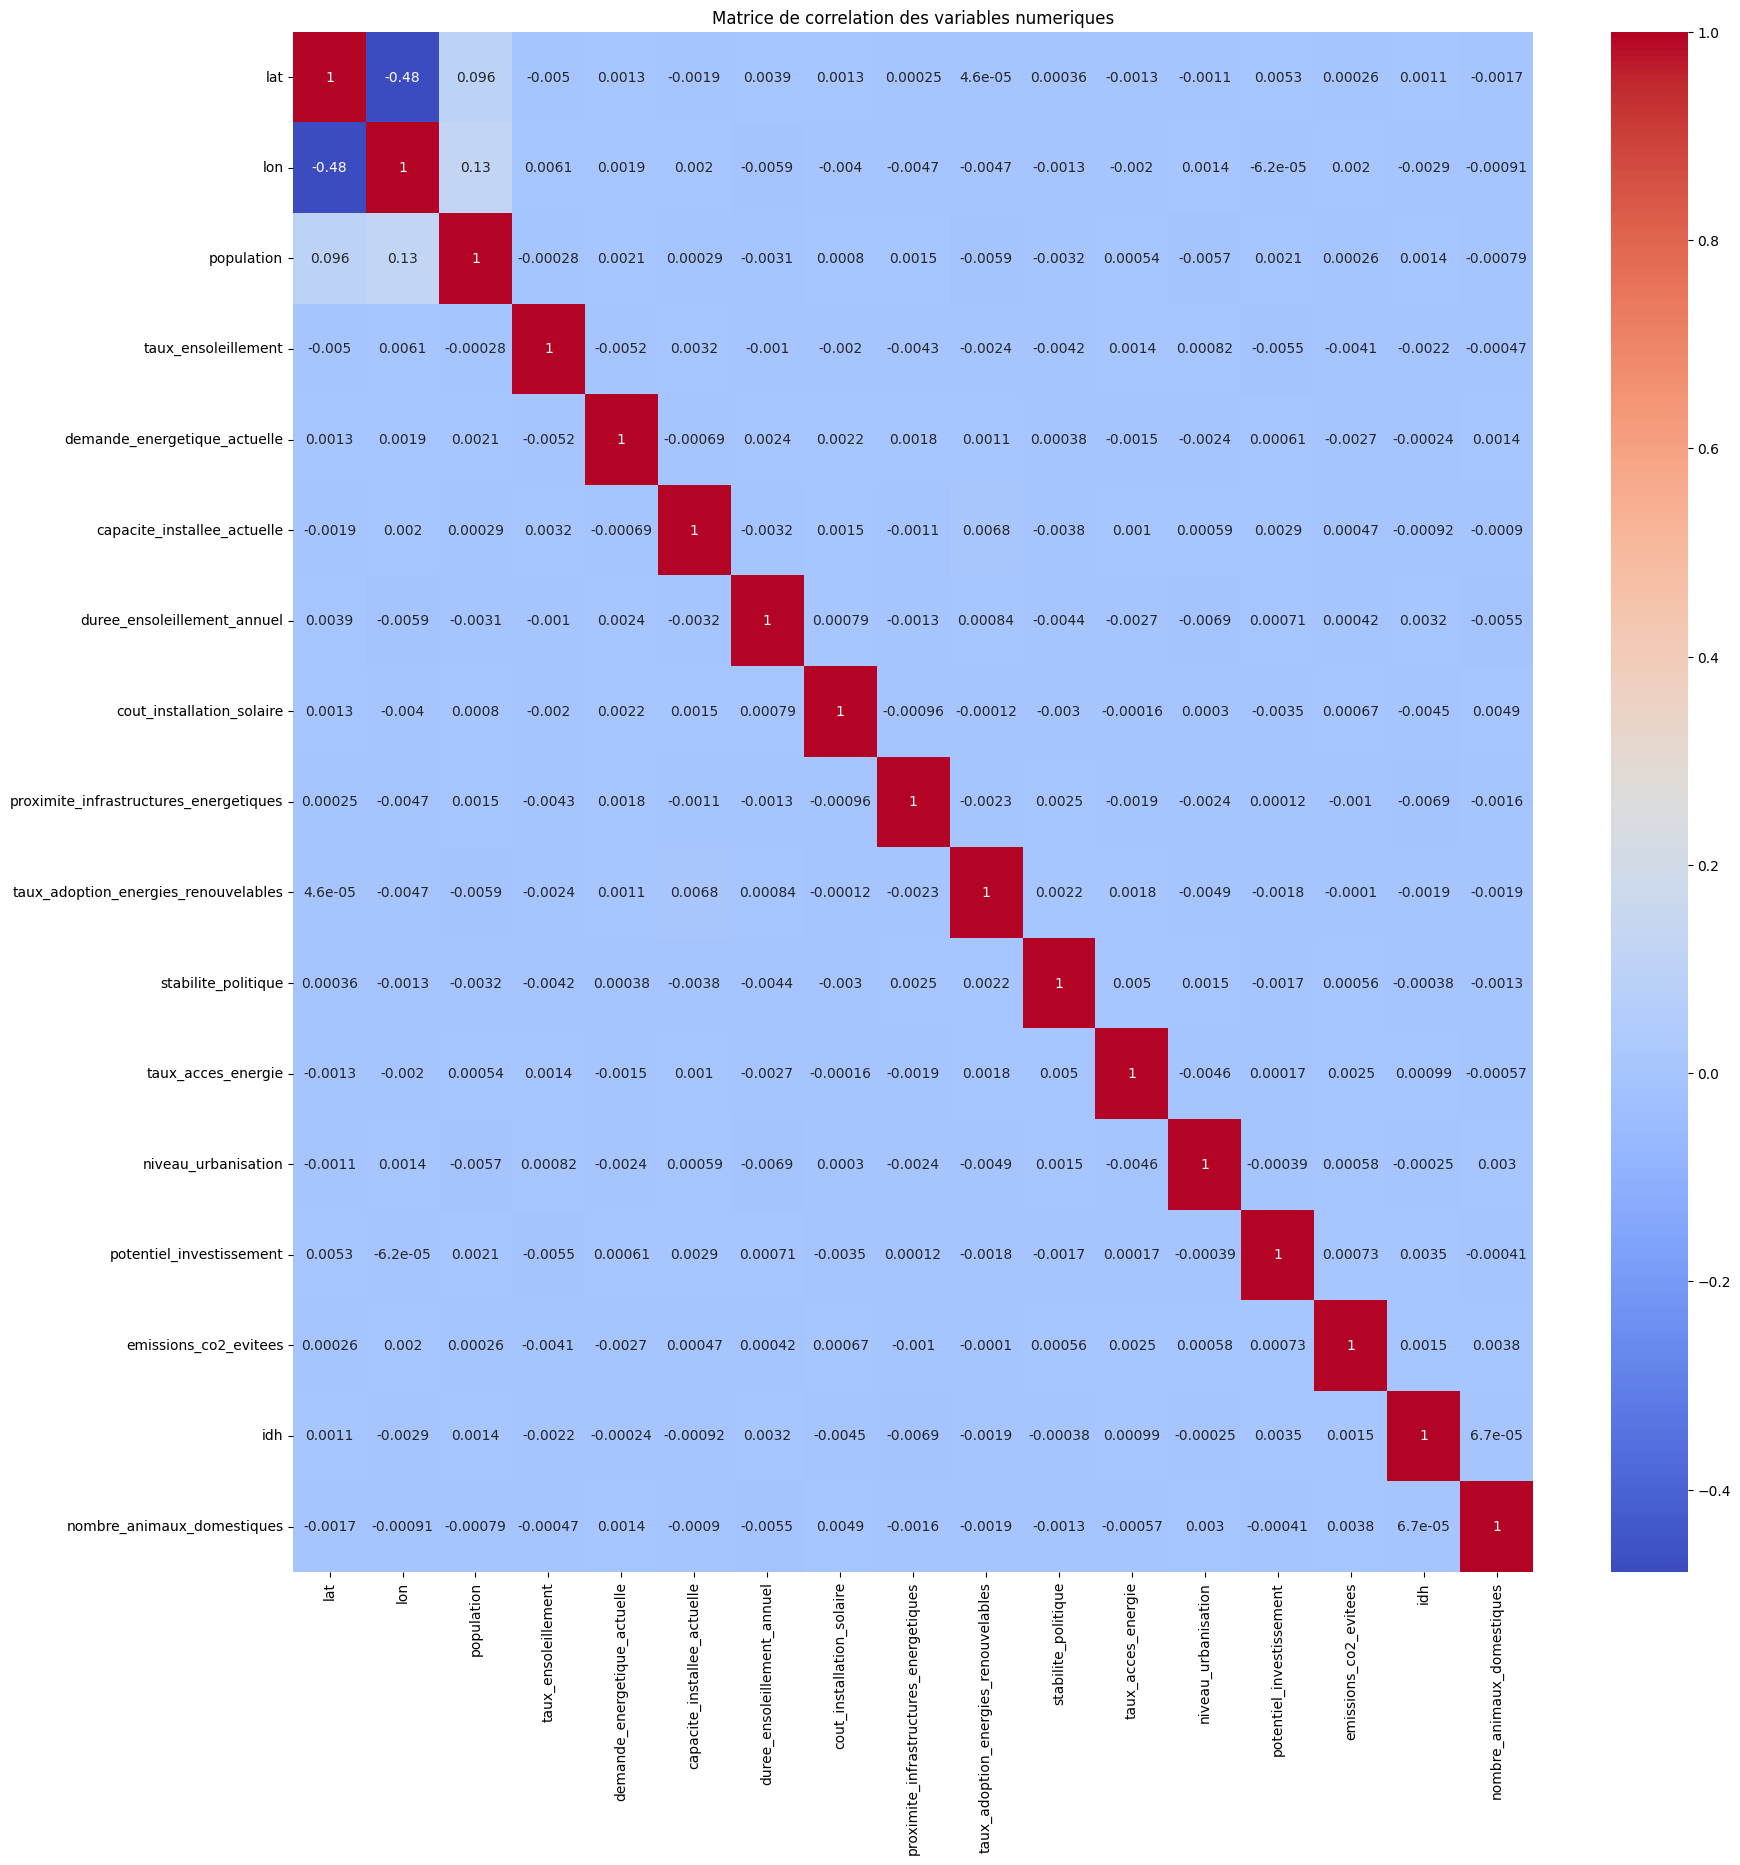

In [19]:
plt.figure(figsize = (20,20))
sns.heatmap(mat_cor, cmap = 'coolwarm', annot = True)
plt.title('Matrice de correlation des variables numeriques')
plt.show()

In [20]:
# Calcule du coefficient d'applattissement
skew_coef = train['demande_energetique_projectee'].skew()
skew_coef

0.28670000839099974

# Pretraitement des Données

In [21]:
# copy de la dataframe
dataframe = train.copy()
testframe = test.copy()
subframe = sub.copy()

## Gestion des valeurs manquantes

In [22]:
# gestion des valeurs manquantes
dataframe.isnull().sum()

,0
country,0
lat,0
lon,0
population,0
taux_ensoleillement,0
demande_energetique_actuelle,0
demande_energetique_projectee,0
capacite_installee_actuelle,0
duree_ensoleillement_annuel,0
cout_installation_solaire,0


In [23]:
dataframe['taux_adoption_energies_renouvelables'] = dataframe['taux_adoption_energies_renouvelables'].fillna(dataframe['taux_adoption_energies_renouvelables'].mean())
dataframe.isnull().sum()

,0
country,0
lat,0
lon,0
population,0
taux_ensoleillement,0
demande_energetique_actuelle,0
demande_energetique_projectee,0
capacite_installee_actuelle,0
duree_ensoleillement_annuel,0
cout_installation_solaire,0


In [24]:
testframe['taux_adoption_energies_renouvelables'] = testframe['taux_adoption_energies_renouvelables'].fillna(testframe['taux_adoption_energies_renouvelables'].mean())
subframe['taux_adoption_energies_renouvelables'] = subframe['taux_adoption_energies_renouvelables'].fillna(subframe['taux_adoption_energies_renouvelables'].mean())

In [25]:
mean_adoption = dataframe.groupby('country').agg({'taux_adoption_energies_renouvelables':'mean'})
mean_adoption

,taux_adoption_energies_renouvelables
country,
Algeria,24.971973
Angola,25.098396
Benin,25.625557
Botswana,24.601834
Burkina Faso,25.180276
Burundi,25.358364
Cameroon,24.969350
Cape Verde,25.733447
Central African Republic,24.871258


## Encodage des Variables Categorielles

In [26]:
dataframe['habit_de_mariage'] = dataframe['habit_de_mariage'].map({'moderne':1, 'traditionnel':0})
dataframe['habit_de_mariage'].value_counts()

,count
habit_de_mariage,
0,75010
1,74990


In [27]:
sols = pd.get_dummies(dataframe['types_sols'], dtype = int)
sols.head(5)

,argileux,rocheux,sablonneux
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,1,0,0


In [28]:
new_data = pd.concat([dataframe.drop(columns = ['types_sols','country']), sols],axis =1 )
new_data.head(5)

,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,demande_energetique_projectee,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,proximite_infrastructures_energetiques,...,taux_acces_energie,niveau_urbanisation,potentiel_investissement,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques,argileux,rocheux,sablonneux
0,-19.0154,29.1549,14862924,5.004870,485.085906,544.232257,583.128945,3936.978948,926.985577,15.450396,...,67.501053,35.733884,4,555.209808,0.441787,0,2,0,1,0
1,-0.2280,15.8277,5518092,4.609972,1422.802172,1864.048290,163.908475,3753.749894,862.739803,1.461833,...,61.851008,40.134654,2,3722.310275,0.380139,0,5,0,0,1
2,-22.9576,18.4904,2540905,5.792826,4711.082367,5525.433108,1404.435659,3804.854034,1298.932535,17.135819,...,17.384882,46.964564,5,9824.421047,0.678362,1,0,1,0,0
3,5.1521,46.1996,15893222,4.104030,799.426659,1447.543617,1370.179083,2047.305693,1256.611785,24.705938,...,21.744383,40.211287,1,9407.183123,0.731126,1,7,0,1,0
4,-4.0383,21.7587,89561403,6.103335,2526.920477,3029.604497,962.398626,3421.335117,1484.398731,59.177555,...,47.679339,63.201230,3,9184.154421,0.357112,1,2,1,0,0


In [29]:
testframe['habit_de_mariage'] = testframe['habit_de_mariage'].map({'moderne':1, 'traditionnel':0})
sols_test = pd.get_dummies(testframe['types_sols'], dtype = int)

In [30]:
subframe['habit_de_mariage'] = subframe['habit_de_mariage'].map({'moderne':1, 'traditionnel':0})
sols_sub = pd.get_dummies(subframe['types_sols'], dtype = int)

In [31]:
new_test = pd.concat([testframe.drop(columns = ['types_sols','country']), sols_test],axis =1 )
new_test.head(5)

,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,demande_energetique_projectee,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,proximite_infrastructures_energetiques,...,taux_acces_energie,niveau_urbanisation,potentiel_investissement,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques,argileux,rocheux,sablonneux
0,9.9456,-9.6966,13132795,4.127216,1742.542776,2157.259405,1021.851235,3835.946683,872.520272,85.898928,...,76.425479,35.358111,5,4048.488123,0.328018,1,7,0,1,0
1,21.0079,-10.9408,4649658,5.008540,255.495071,428.684740,1617.543567,2739.032034,1096.259730,85.766599,...,57.176834,49.970568,4,6999.991146,0.400916,0,5,1,0,0
2,-30.5595,22.9375,59308690,6.976930,3768.494240,5678.901223,946.143038,2011.915469,938.680998,11.741314,...,78.470385,61.007593,5,6697.363318,0.397704,1,1,1,0,0
3,-29.6099,28.2336,2142249,5.076239,2060.610984,2315.866464,1962.312061,2002.905853,990.823495,4.196988,...,88.105215,55.505618,1,2178.227735,0.527368,1,0,1,0,0
4,-11.6455,43.3333,869601,6.462166,2080.772325,2952.531976,623.492275,3800.268025,1157.289352,16.107675,...,31.325681,47.514292,4,6494.836948,0.425716,0,7,0,1,0


In [32]:
new_sub = pd.concat([subframe.drop(columns = ['types_sols','country']), sols_sub],axis =1 )
new_sub.head(5)

,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,proximite_infrastructures_energetiques,taux_adoption_energies_renouvelables,...,taux_acces_energie,niveau_urbanisation,potentiel_investissement,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques,argileux,rocheux,sablonneux
0,8.4606,-11.7799,7976983,6.016310,2288.205830,1506.365949,3856.453895,1453.281847,56.433841,25.196118,...,35.022992,58.938006,2,9432.861305,0.722109,0,3,0,0,1
1,8.4606,-11.7799,7976983,6.410925,2402.680846,1878.297944,3652.332264,1076.560589,46.100498,27.037202,...,52.154399,58.293952,4,7466.567405,0.518997,0,3,1,0,0
2,6.8769,31.3069,11193725,4.642565,3996.471566,344.400305,3810.507756,980.596863,88.583926,47.880078,...,79.302572,24.914731,2,1239.535797,0.785365,1,9,0,0,1
3,-18.6657,35.5296,31255435,5.704522,3134.406856,1614.664206,3319.984749,1373.043279,45.876645,40.282065,...,47.551657,35.089942,3,7052.913351,0.400865,0,9,0,0,1
4,-19.0154,29.1549,14862924,6.581508,2560.551232,1151.776893,2829.581194,895.661665,91.039562,10.630429,...,75.120867,46.989207,5,9744.951246,0.516602,0,6,0,1,0


# Selection de Variables Pertinentes

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

In [36]:
X_train =new_data.drop(columns = ['demande_energetique_projectee'])
y_train = new_data['demande_energetique_projectee']
print(X_train.shape)
print(y_train.shape)
# test set
X_test = new_test.drop(columns = ['demande_energetique_projectee'])
y_test = new_test['demande_energetique_projectee']
print(X_test.shape)
print(y_test.shape)
# submission set
X_sub = new_sub
print(X_sub.shape)

(150000, 21)
(150000,)
(62500, 21)
(62500,)
(25000, 21)


In [37]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_sub_norm = norm.transform(X_sub)

In [38]:
# Retransformation en dataframe
X_trainN = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_testN = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_subN = pd.DataFrame(X_sub_norm, columns = X_sub.columns)

In [39]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDRegressor
selecteur = RFECV(SGDRegressor(max_iter = 1000, random_state = 10), step = 1, min_features_to_select = 10, cv = 10)
selecteur.fit(X_trainN, y_train)


RFECV(cv=10, estimator=SGDRegressor(random_state=10), min_features_to_select=10)

In [40]:
print(selecteur.get_support())
print(selecteur.ranking_)

[False False  True False  True False  True  True False False  True  True
  True False False  True  True False  True  True  True]
[ 7  8  1  4  1  6  1  1  9  3  1  1  1  5 10  1  1  2  1  1  1]


In [41]:
selecteur.get_feature_names_out()

array(['population', 'demande_energetique_actuelle',
       'duree_ensoleillement_annuel', 'cout_installation_solaire',
       'stabilite_politique', 'taux_acces_energie', 'niveau_urbanisation',
       'idh', 'habit_de_mariage', 'argileux', 'rocheux', 'sablonneux'],
      dtype=object)

In [42]:
X_train_prepared = X_trainN[['population', 'demande_energetique_actuelle',
       'duree_ensoleillement_annuel', 'cout_installation_solaire',
       'stabilite_politique', 'taux_acces_energie', 'niveau_urbanisation',
       'idh', 'habit_de_mariage', 'argileux', 'rocheux', 'sablonneux']]

X_test_prepared = X_testN[['population', 'demande_energetique_actuelle',
       'duree_ensoleillement_annuel', 'cout_installation_solaire',
       'stabilite_politique', 'taux_acces_energie', 'niveau_urbanisation',
       'idh', 'habit_de_mariage', 'argileux', 'rocheux', 'sablonneux']]

X_sub_prepared = X_subN[['population', 'demande_energetique_actuelle',
       'duree_ensoleillement_annuel', 'cout_installation_solaire',
       'stabilite_politique', 'taux_acces_energie', 'niveau_urbanisation',
       'idh', 'habit_de_mariage', 'argileux', 'rocheux', 'sablonneux']]

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_prepared
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data.sort_values(by = 'VIF', ascending = False))

                         feature       VIF
10                       rocheux  8.563312
9                       argileux  8.530338
11                    sablonneux  8.507854
6            niveau_urbanisation  1.000144
2    duree_ensoleillement_annuel  1.000118
3      cout_installation_solaire  1.000088
0                     population  1.000085
4            stabilite_politique  1.000082
5             taux_acces_energie  1.000077
7                            idh  1.000054
8               habit_de_mariage  1.000052
1   demande_energetique_actuelle  1.000037


# Creation du modele de Regression Lasso

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train_prepared, y_train)

Lasso(alpha=0.5)

In [45]:
scores = cross_val_score(lasso, X_train_prepared, y_train, cv = 10)
print(scores.mean())

0.8794768724147921


In [46]:
y_test_pred_l = lasso.predict(X_test_prepared)
y_sub_pred_l = lasso.predict(X_sub_prepared)

In [47]:
print(f'RMSE du model Lasso pour les données de test: {np.sqrt(mean_squared_error(y_test, y_test_pred_l))}')

RMSE du model Lasso pour les données de validation: 796.5994103225245


In [48]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas = np.logspace(-5, 1, 100), cv = 5, max_iter = 1000)
lassocv.fit(X_train_prepared, y_train)

LassoCV(alphas=array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590727e-05, 7.05480231e-05, 8.11130831e-05,
       9.32603347e-05, 1.07226722e-04, 1.23284674e-04, 1.41747416e-04,
       1.62975083e-04, 1.87381742e-0...
       4.03701726e-01, 4.64158883e-01, 5.33669923e-01, 6.13590727e-01,
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01]),
        cv=5)

In [49]:
y_test_pred_lcv = lassocv.predict(X_test_prepared)
y_sub_pred_lcv = lasso.predict(X_sub_prepared)

In [51]:
print(f'RMSE du model LassoCV pour les données de validation: {np.sqrt(mean_squared_error(y_test, y_test_pred_lcv))}')

RMSE du model LassoCV pour les données de validation: 796.5991219155053


# Courbes d'apprentissage

Text(0, 0.5, 'MSE')

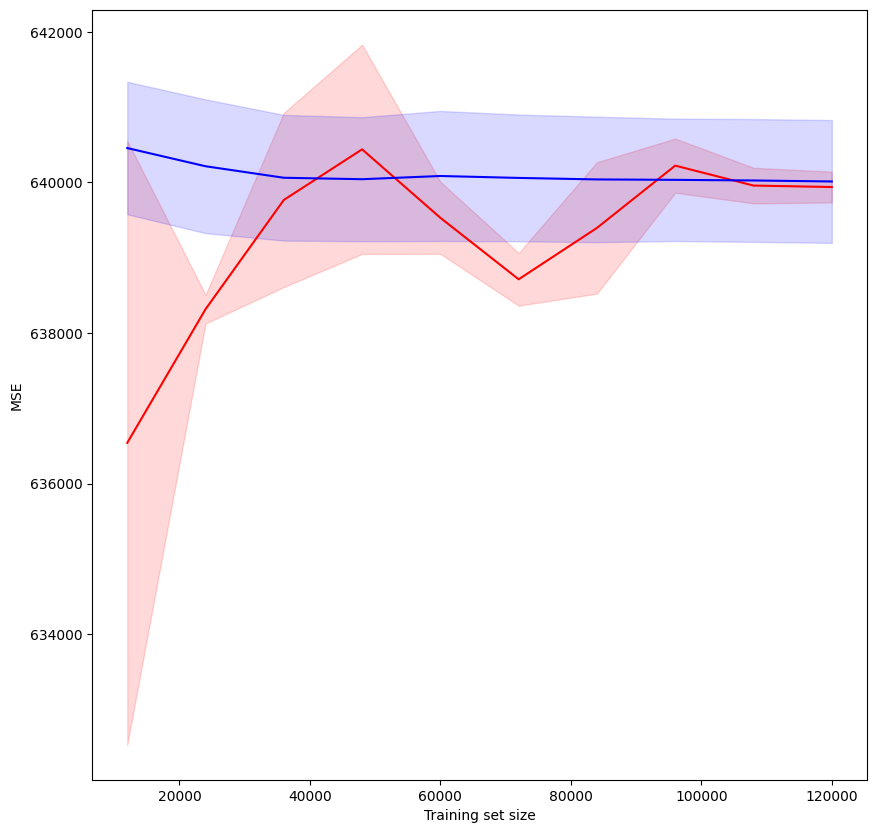

In [52]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(lasso, X_train_prepared, y_train, train_sizes = np.linspace(0.1, 1, 10), cv = 5, scoring='neg_mean_squared_error')
train_mean = -train_scores.mean(axis = 1)
train_std = train_scores.std(axis = 1)
val_mean = -val_scores.mean(axis = 1)
val_std = val_scores.std(axis = 1)



plt.figure(figsize=(10, 10))
plt.plot(train_sizes, train_mean, label='Training error',color = 'red')
plt.plot(train_sizes, val_mean, label='Validation error',color = 'blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color = 'red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color = 'blue')
plt.xlabel('Training set size')
plt.ylabel('MSE')


In [56]:
print(type(subframe))
print(type(y_sub_pred_lcv))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [61]:
subframe.shape

(25000, 20)

In [60]:
y_sub_pred_lcv_dtframe = pd.DataFrame(y_sub_pred_lcv, columns = ['demande_energetique_projectee'])
y_sub_pred_lcv_dtframe.shape

(25000, 1)

In [62]:
subframe['demande_energetique_projectee'] = y_sub_pred_lcv_dtframe

In [64]:
subframe.head(5)

,country,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,proximite_infrastructures_energetiques,...,stabilite_politique,taux_acces_energie,niveau_urbanisation,potentiel_investissement,types_sols,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques,demande_energetique_projectee
0,Sierra Leone,8.4606,-11.7799,7976983,6.016310,2288.205830,1506.365949,3856.453895,1453.281847,56.433841,...,9.187338,35.022992,58.938006,2,sablonneux,9432.861305,0.722109,0,3,3486.045797
1,Sierra Leone,8.4606,-11.7799,7976983,6.410925,2402.680846,1878.297944,3652.332264,1076.560589,46.100498,...,5.307233,52.154399,58.293952,4,argileux,7466.567405,0.518997,0,3,3660.333875
2,South Sudan,6.8769,31.3069,11193725,4.642565,3996.471566,344.400305,3810.507756,980.596863,88.583926,...,1.462924,79.302572,24.914731,2,sablonneux,1239.535797,0.785365,1,9,6102.913987
3,Mozambique,-18.6657,35.5296,31255435,5.704522,3134.406856,1614.664206,3319.984749,1373.043279,45.876645,...,5.420247,47.551657,35.089942,3,sablonneux,7052.913351,0.400865,0,9,4776.636991
4,Zimbabwe,-19.0154,29.1549,14862924,6.581508,2560.551232,1151.776893,2829.581194,895.661665,91.039562,...,3.527300,75.120867,46.989207,5,rocheux,9744.951246,0.516602,0,6,3901.283858


In [71]:
y_sub_pred_lcv_dtframe.to_csv('submission1.csv', sep = ',', encoding = 'utf-8', index = True)

In [72]:
subframe.to_csv('submission_frame.csv', sep = ',', encoding = 'utf-8', index = True)